<a href="https://colab.research.google.com/github/Sanjanathakal/CPE695FP/blob/master/Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importing all the required Libraies

In [1]:
from pathlib import Path
import pandas as pd
import numpy as np
import keras
import os
import os.path
import sys

import librosa                                                          #To extract the data from the audio files.
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier                      #For KNN
from sklearn.svm import SVC                                             #For SVM
from sklearn.preprocessing import LabelEncoder                          #For Naives Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split


import matplotlib
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.utils.class_weight import compute_class_weight
import itertools
import xgboost as xgb
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_extraction.text import CountVectorizer

from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, precision_score, recall_score

from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### Importing Datafile

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:

dataset = pd.read_csv('/content/drive/MyDrive/CPE PROJECT/features-2.csv')

In [4]:
X = dataset.iloc[:,:-1]
Y = dataset.iloc[:,-1]
# print (Y)
# print(X.shape)
# print(Y.shape)

In [5]:
#print(Y)
Y1 = Y.copy()
encoder = OneHotEncoder()
Y = encoder.fit_transform(np.array(Y).reshape(-1,1)).toarray()
#print(Y)

In [6]:
d={}
Y_enc=Y.argmax(axis=1)
for i in range(len(Y1)):
  d[Y1[i]] = Y_enc[i]
for i in d.keys():
  print(i," = ",d[i])


neutral  =  5
angry  =  0
sad  =  6
happy  =  4
calm  =  1
fear  =  3
surprise  =  7
disgust  =  2


### Splitting the Data

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, random_state=0, shuffle=True)
x_train.shape, y_train.shape, x_test.shape, y_test.shape
# print some details
# number of samples in training data
print("[+] Number of training samples:", x_train.shape[0])
# number of samples in testing data
print("[+] Number of testing samples:", x_test.shape[0])

print("[+] Number of features:", x_train.shape[1])

[+] Number of training samples: 10980
[+] Number of testing samples: 3660
[+] Number of features: 162


### Normalization

In [8]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((10980, 162), (10980, 8), (3660, 162), (3660, 8))

### Code for confusion Matrix


In [9]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)


    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Decision tree


0.6866120218579235
              precision    recall  f1-score   support

           0       0.73      0.69      0.71       498
           1       0.62      0.53      0.57       144
           2       0.61      0.62      0.62       513
           3       0.73      0.77      0.75       489
           4       0.60      0.62      0.61       503
           5       0.79      0.80      0.79       479
           6       0.72      0.72      0.72       526
           7       0.64      0.65      0.64       508

   micro avg       0.69      0.69      0.69      3660
   macro avg       0.68      0.67      0.68      3660
weighted avg       0.69      0.69      0.69      3660
 samples avg       0.69      0.69      0.69      3660



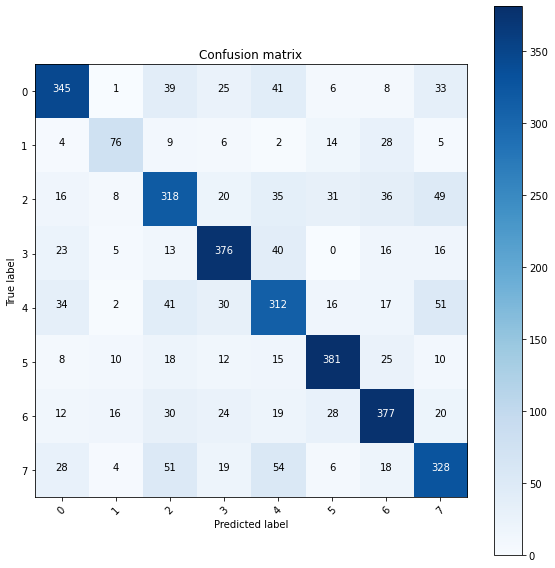

In [10]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


dtree_model = DecisionTreeClassifier().fit(x_train, y_train) 
dtree_predictions = dtree_model.predict(x_test) 

print("The Test Accuracy is : {:.2f}%" 100*format(accuracy_score(y_true=y_test,y_pred=dtree_predictions)))
# creating a confusion matrix 
C=confusion_matrix(y_test.argmax(axis=1), dtree_predictions.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

### SVM

0.8284153005464481


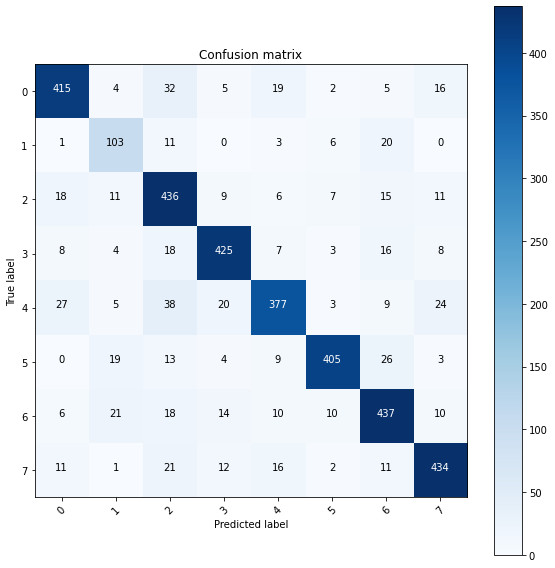

In [11]:
from sklearn.svm import SVC
import numpy as np
import matplotlib as mpl
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
svc=SVC()
clf = GridSearchCV(svc, parameters)
clf.fit(x_train, y_train.argmax(axis=1))

y_pred=clf.predict(x_test)
print("The testing accuracy is : {0.2f%}",100*(format(accuracy_score(y_true=y_test.argmax(axis=1),y_pred=y_pred))))
C=confusion_matrix(y_test.argmax(axis=1), y_pred)
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

### Random Forest


Test Set Accuracy =  63.0


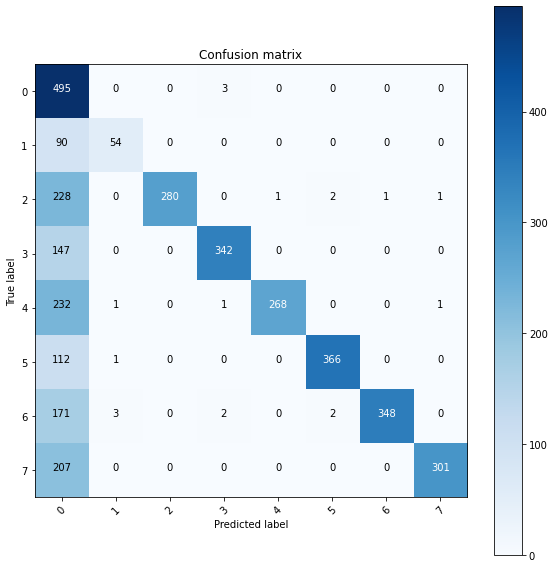

In [22]:
# !pip install enable_halving_search_cv
# import enable_halving_search_cv
# from sklearn.experimental import enable_halving_search_cv  # noqa
#from sklearn.model_selection import HalvingGridSearchCV

rf_classifier = RandomForestClassifier(random_state=0)
#param_grid = {"max_depth": [3, None],"min_samples_split": [5, 10]}
#search = HalvingGridSearchCV(rf_classifier, param_grid, resource='n_estimators',max_resources=10,random_state=0).fit(x_train, y_train)
rf_classifier.fit(x_train,y_train)
# Predict
pred_probs = rf_classifier.predict(x_test)

print()

pred = np.argmax(pred_probs, axis=-1)
print('Test Set Accuracy = ',100*(round(accuracy_score(y_true=y_test,y_pred=pred_probs),2)))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=pred)
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))


### KNN

Accuracy: 77.02%


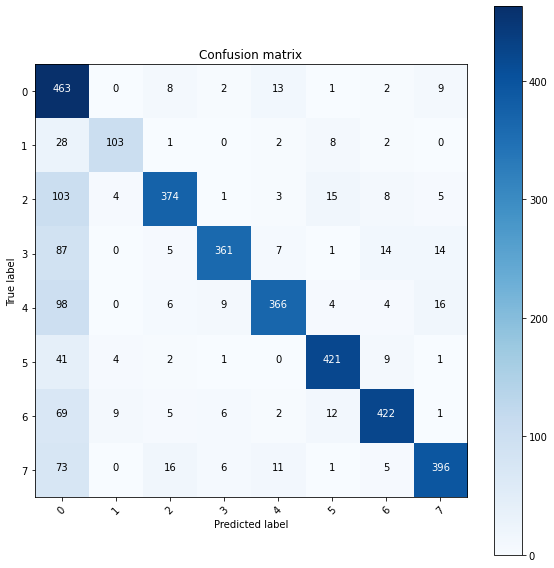

In [23]:
knn_class = KNeighborsClassifier()
pred_yp_knn = knn_class.fit(x_train,y_train).predict(x_test)
accuracy = accuracy_score(y_test, pred_yp_knn)
print("Accuracy: {:.2f}%".format(accuracy*100))
C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=pred_yp_knn.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

### MLP 

Accuracy: 85.77%


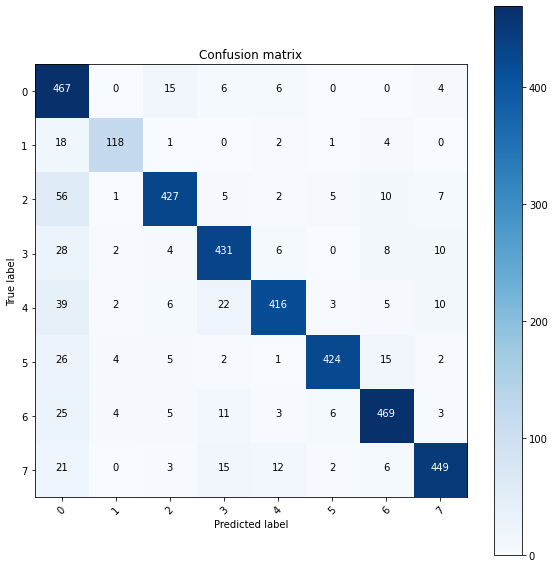

In [24]:
from sklearn.neural_network import MLPClassifier
model=MLPClassifier(alpha=0.01, batch_size=256, epsilon=1e-08, hidden_layer_sizes=(300,150,75), learning_rate='adaptive', max_iter=800)
model.fit(x_train,y_train)
MLPClassifier=MLPClassifier(activation='relu', alpha=0.01, batch_size=256, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(300,), learning_rate='adaptive',
       learning_rate_init=0.001, max_iter=800, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
y_pred=model.predict(x_test)
accuracy=accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=y_pred.argmax(axis=1))
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))

### Naive Bayes

Accuracy: 26.97%


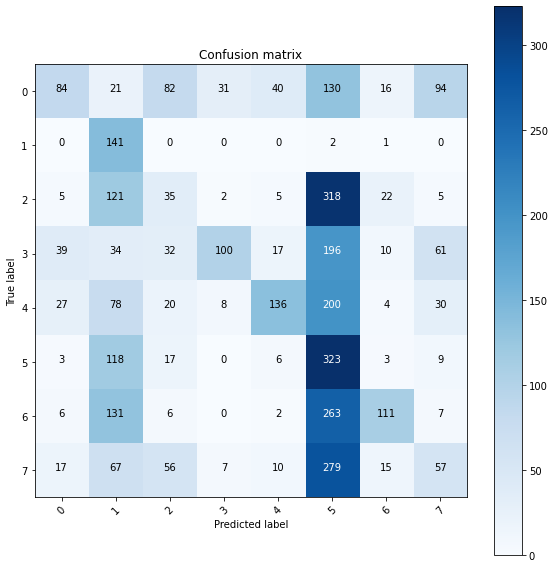

In [33]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnbmodel=gnb.fit(x_train, y_train.argmax(axis=1))
y_pred = gnbmodel.predict(x_test)

accuracy=accuracy_score(y_true=y_test.argmax(axis=1), y_pred=y_pred)
print("Accuracy: {:.2f}%".format(accuracy*100))

C = confusion_matrix(y_true=y_test.argmax(axis=1),y_pred=y_pred)
plot_confusion_matrix(C,classes=list(set(Y.argmax(axis=1))))